<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/Hepatitis_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set:

Data Source:
https://archive.ics.uci.edu/ml/datasets/Hepatitis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Class: DIE, LIVE

AGE: 10, 20, 30, 40, 50, 60, 70, 80

SEX: male, female

STEROID: no, yes

ANTIVIRALS: no, yes

FATIGUE: no, yes

MALAISE: no, yes

ANOREXIA: no, yes

LIVER BIG: no, yes

LIVER FIRM: no, yes

SPLEEN PALPABLE: no, yes

SPIDERS: no, yes

ASCITES: no, yes

VARICES: no, yes

BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
-- see the note below

ALK PHOSPHATE: 33, 80, 120, 160, 200, 250

SGOT: 13, 100, 200, 300, 400, 500

ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0

PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90

HISTOLOGY: no, yes

In [2]:
df = pd.read_csv('/content/hepatitis_csv.csv')

In [3]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [5]:
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In [6]:
df.describe(exclude=['float','int'])

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
count,155,154,155,154,154,154,145,144,150,150,150,150,155,155
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,female,True,False,True,False,False,True,False,False,False,False,False,False,live
freq,139,78,131,100,93,122,120,84,120,99,130,132,85,123


In [7]:
df.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

EDA

In [8]:
cat_var = list(df.describe(exclude=['float','int']).columns)

In [9]:
cat_var

['sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'histology',
 'class']

In [10]:
cat_var_str = cat_var.copy()

In [11]:
df_str = df.copy()

In [12]:
for i in cat_var:
  df_str[i] = df_str[i].astype(str)


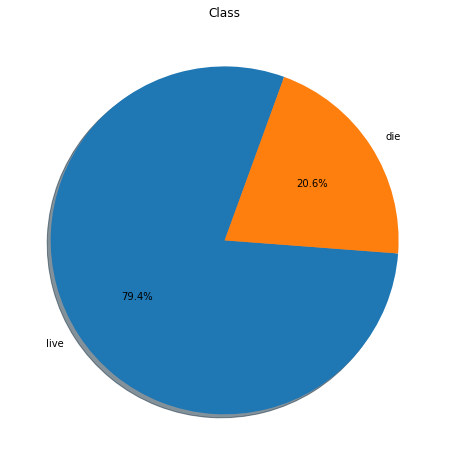

In [13]:
plt.figure(figsize=(10,8))
plt.pie(x=df_str['class'].value_counts().values, labels = df_str['class'].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=70)
plt.title('Class')
plt.show()

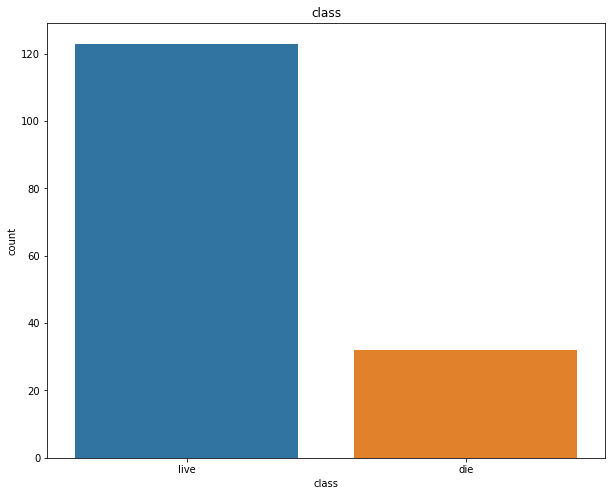

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['class'])
plt.title('class')
plt.show()

The target variable is awfully imbalanced. We likely need to use oversampling at a cost of overfitting. 

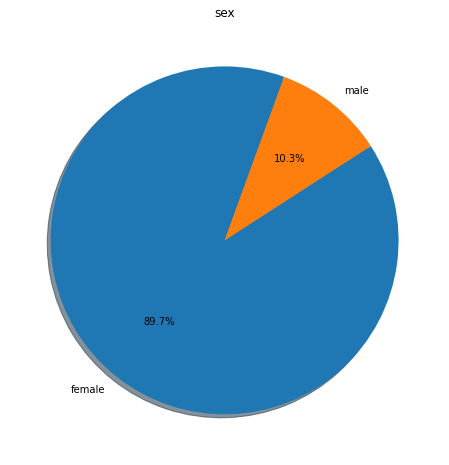

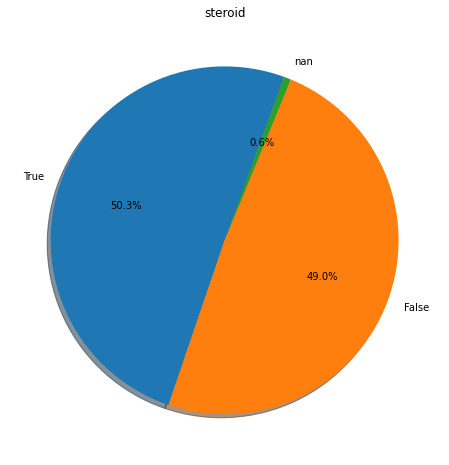

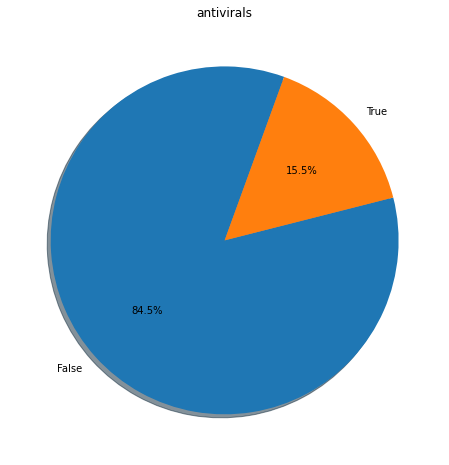

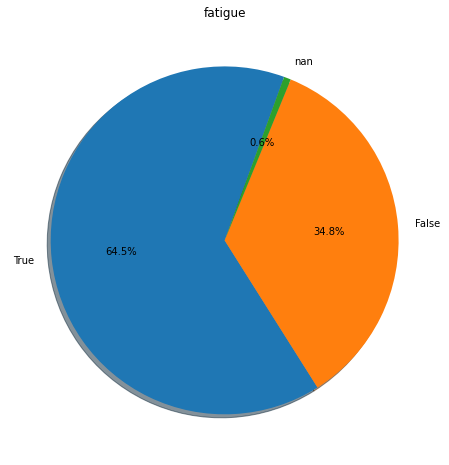

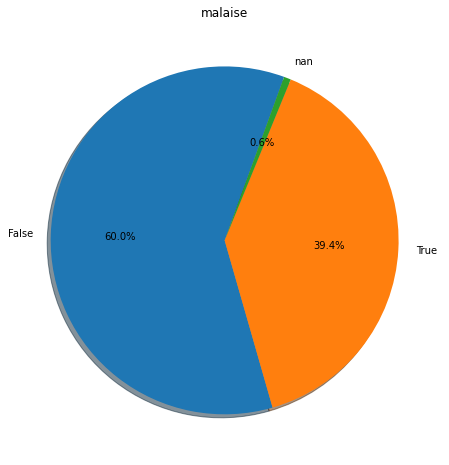

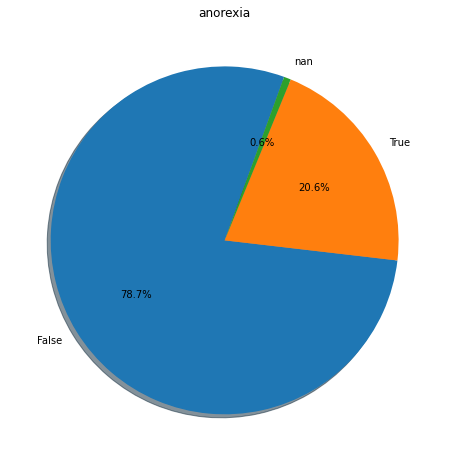

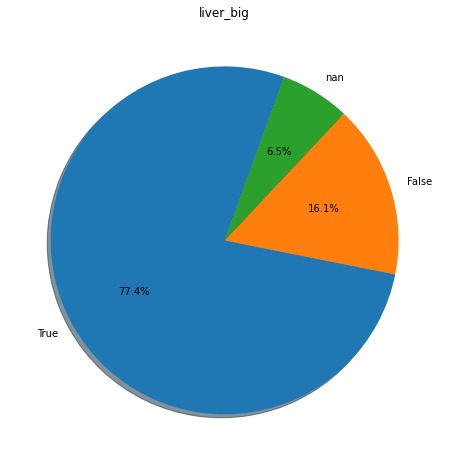

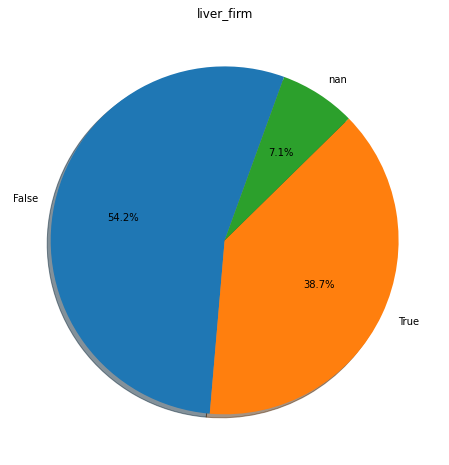

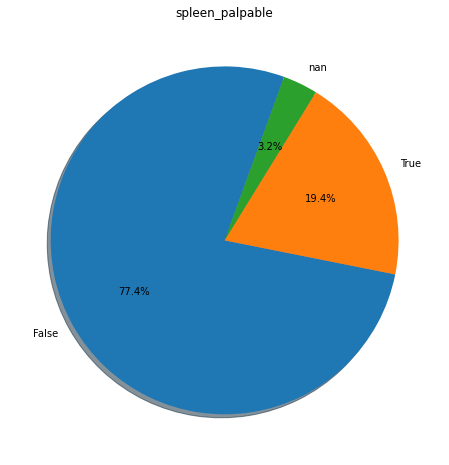

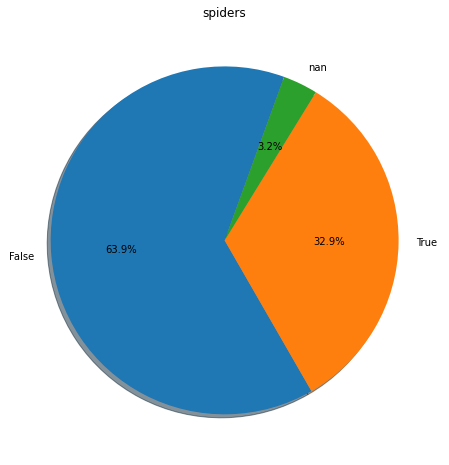

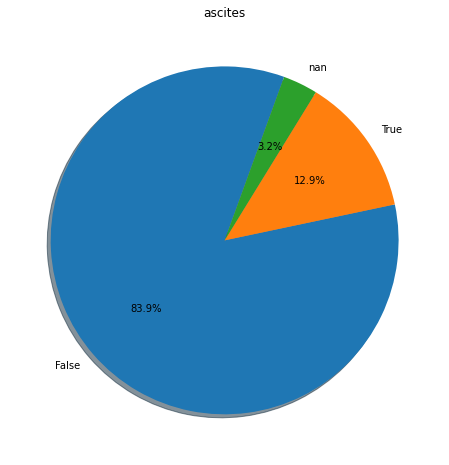

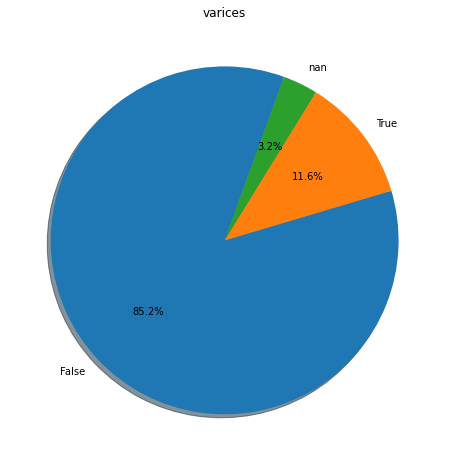

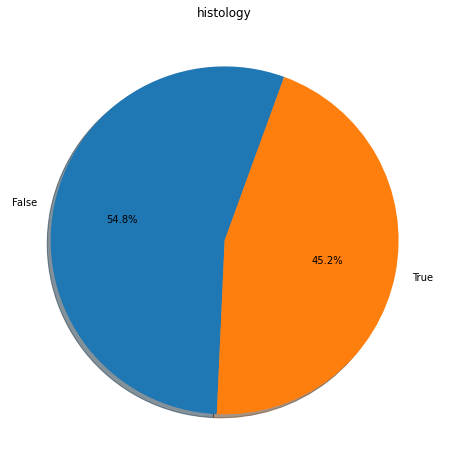

In [15]:
for i in cat_var[:-1]:
  plt.figure(figsize=(10,8))
  plt.pie(x=df_str[i].value_counts().values, labels = df_str[i].value_counts().index, autopct='%1.1f%%', shadow=True, startangle=70)
  plt.title(i)
  plt.show()

sex


<Figure size 720x576 with 0 Axes>

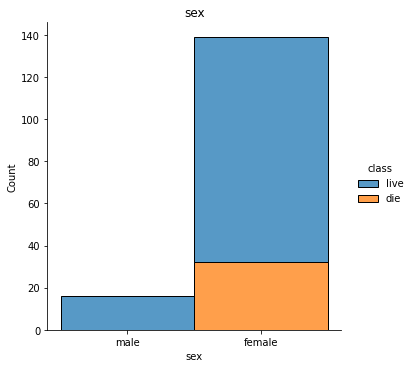

steroid


<Figure size 720x576 with 0 Axes>

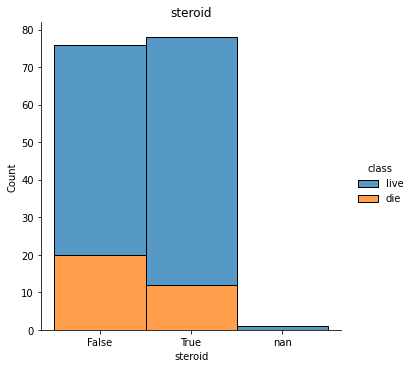

antivirals


<Figure size 720x576 with 0 Axes>

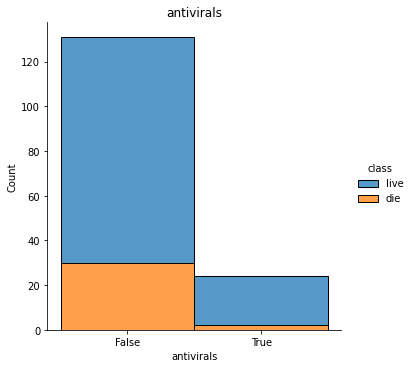

fatigue


<Figure size 720x576 with 0 Axes>

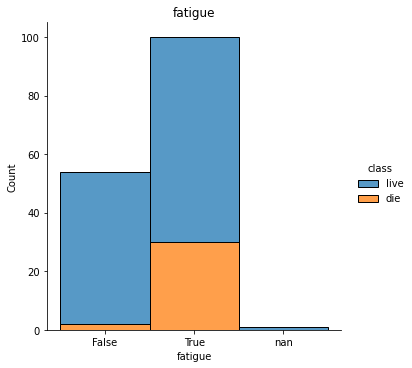

malaise


<Figure size 720x576 with 0 Axes>

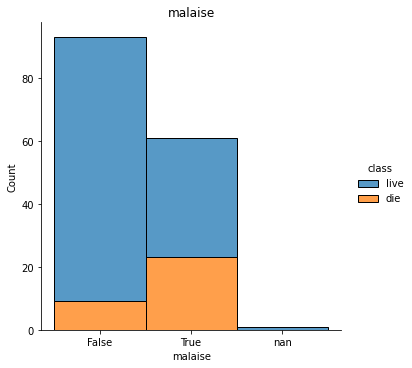

anorexia


<Figure size 720x576 with 0 Axes>

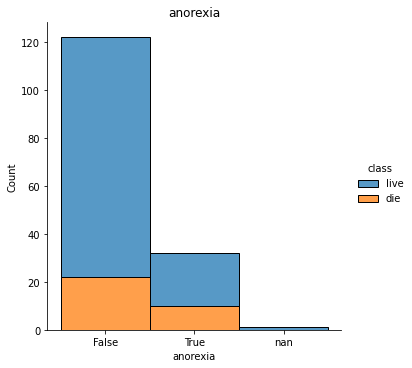

liver_big


<Figure size 720x576 with 0 Axes>

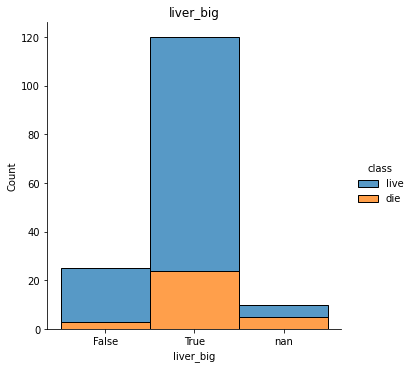

liver_firm


<Figure size 720x576 with 0 Axes>

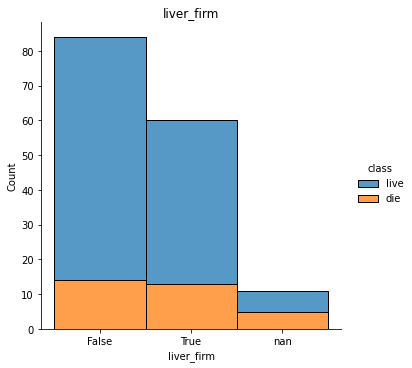

spleen_palpable


<Figure size 720x576 with 0 Axes>

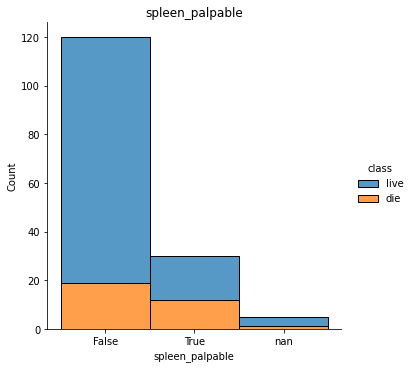

spiders


<Figure size 720x576 with 0 Axes>

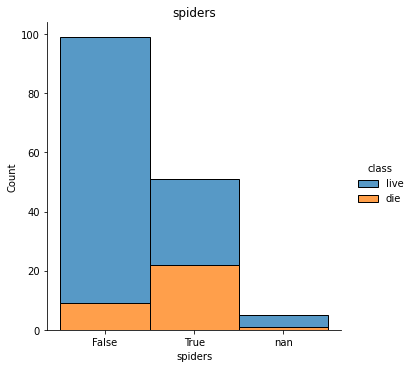

ascites


<Figure size 720x576 with 0 Axes>

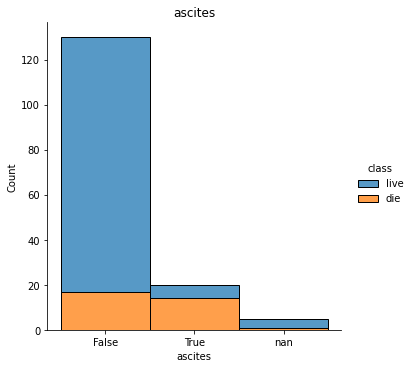

varices


<Figure size 720x576 with 0 Axes>

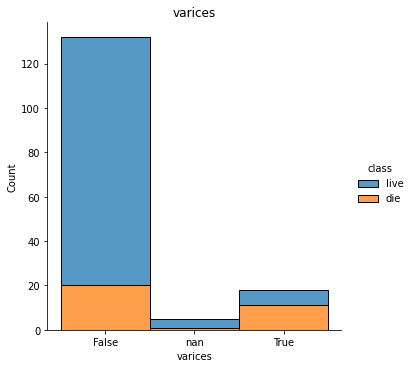

histology


<Figure size 720x576 with 0 Axes>

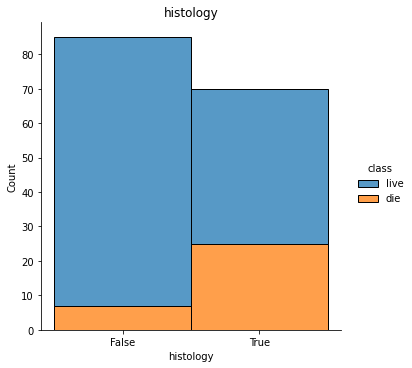

class


<Figure size 720x576 with 0 Axes>

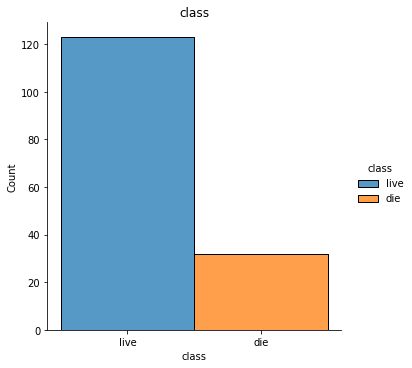

In [16]:
for i in cat_var:
  print(i)
  plt.figure(figsize=(10,8))
  sns.displot(data=df_str, x=i, hue='class', multiple='stack')
  plt.title(i)
  plt.show()

In [17]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


<Figure size 432x288 with 0 Axes>

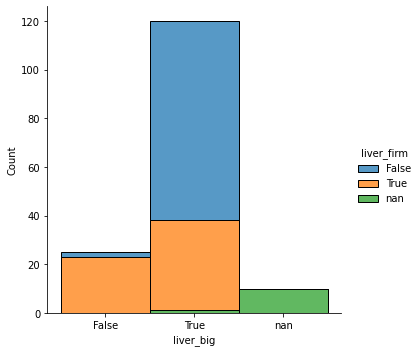

In [18]:
plt.figure()
sns.displot(data = df_str, x=df_str['liver_big'], hue = 'liver_firm', multiple = 'stack' )

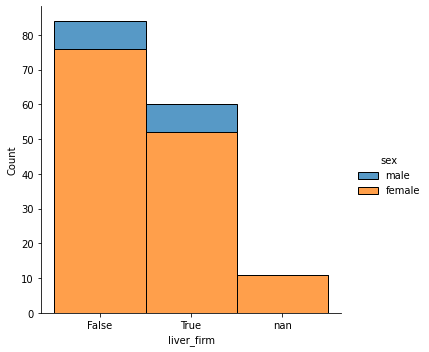

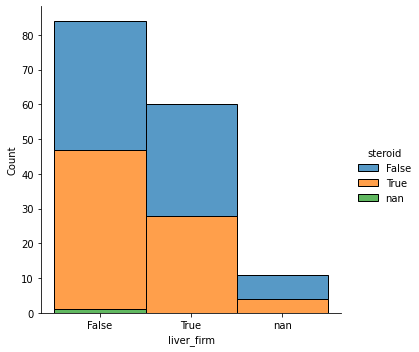

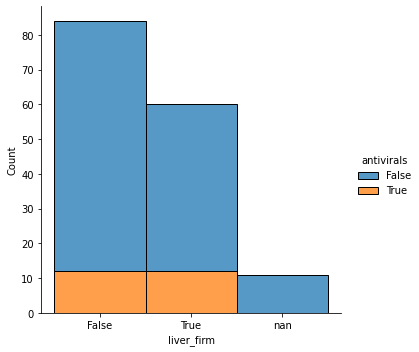

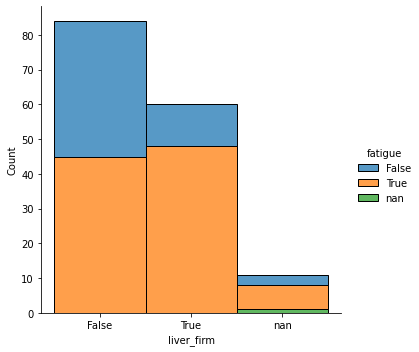

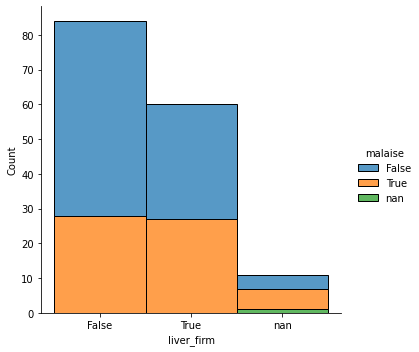

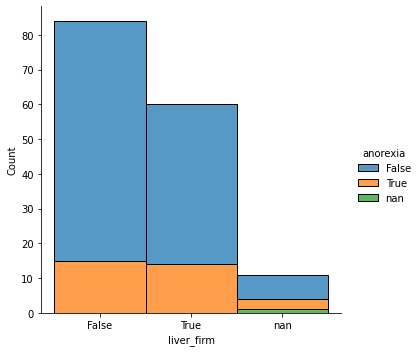

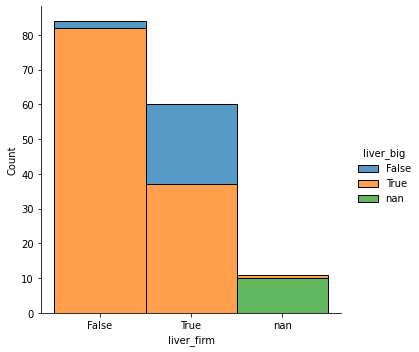

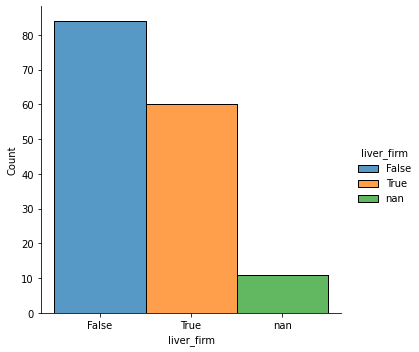

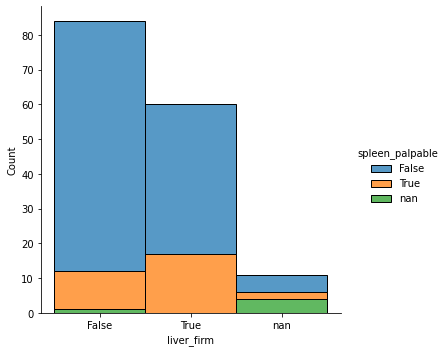

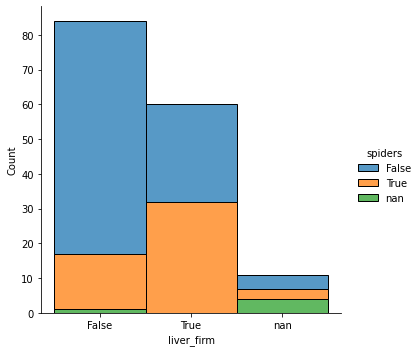

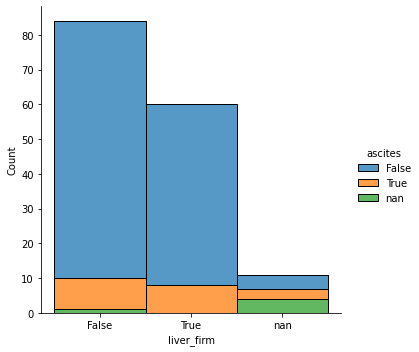

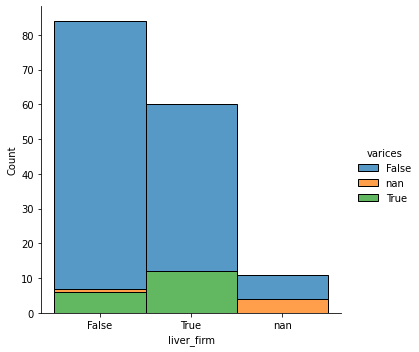

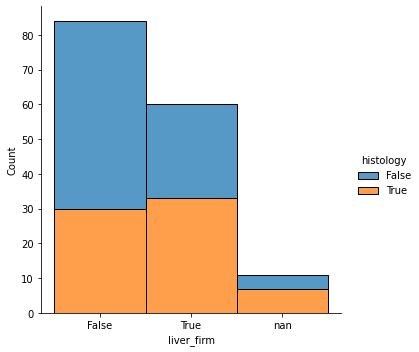

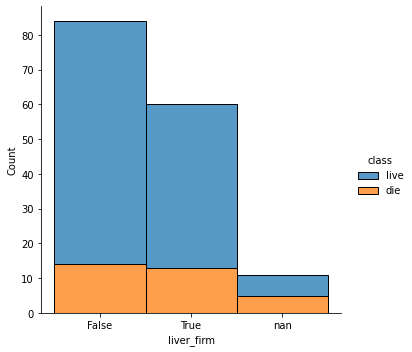

In [19]:
for i in cat_var:
  sns.displot(data = df_str, x=df_str['liver_firm'], hue = i, multiple = 'stack' )

In [20]:
df['liver_firm'].isnull().sum()

11

In [31]:
df[['liver_firm','liver_big']]

,liver_firm,liver_big
0,False,False
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
150,False,True
151,True,True
152,True,False
153,False,True


In [39]:
df['liver_firm'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
150    False
151    False
152    False
153    False
154    False
Name: liver_firm, Length: 155, dtype: bool

In [42]:
df['liver_firm'].iloc[1]

False

In [21]:
for n, i in enumerate(df['liver_firm'].isnull()):
  if i == True:
    print(df['liver_big'].iloc[n])


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
True


In [47]:
df['liver_firm'].isnull().sum()

10